![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 


In [4]:
# read the first data
df1= pd.read_csv('airbnb_price.csv')
df1.head()


listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown

In [5]:
# read the second data
df2= pd.read_table('airbnb_last_review.tsv')
df2.head()


listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019

In [6]:
# read the thord data
df3= pd.read_excel('airbnb_room_type.xlsx')
df3.head()

listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt

In [7]:
# merge all the data together 
df = pd.merge(df1,df2,on='listing_id')
df = pd.merge(df,df3,on='listing_id')
df.head()

listing_id        price                nbhood_full    host_name  \
0        2595  225 dollars         Manhattan, Midtown     Jennifer   
1        3831   89 dollars     Brooklyn, Clinton Hill  LisaRoxanne   
2        5099  200 dollars     Manhattan, Murray Hill        Chris   
3        5178   79 dollars  Manhattan, Hell's Kitchen     Shunichi   
4        5238  150 dollars       Manhattan, Chinatown          Ben   

    last_review                                description        room_type  
0   May 21 2019                      Skylit Midtown Castle  Entire home/apt  
1  July 05 2019            Cozy Entire Floor of Brownstone  Entire home/apt  
2  June 22 2019  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt  
3  June 24 2019            Large Furnished Room Near B'way     private room  
4  June 09 2019         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt

# EDA

In [9]:
df.describe(include='all')

listing_id        price                   nbhood_full host_name  \
count   2.520900e+04        25209                         25209     25201   
unique           NaN          536                           217      7363   
top              NaN  150 dollars  Brooklyn, Bedford-Stuyvesant   Michael   
freq             NaN          982                          2209       215   
mean    2.068922e+07          NaN                           NaN       NaN   
std     1.102928e+07          NaN                           NaN       NaN   
min     2.595000e+03          NaN                           NaN       NaN   
25%     1.202273e+07          NaN                           NaN       NaN   
50%     2.234391e+07          NaN                           NaN       NaN   
75%     3.037669e+07          NaN                           NaN       NaN   
max     3.645581e+07          NaN                           NaN       NaN   

         last_review                       description        room_type  
count          25209                             25199            25209  
unique           190                             24946                9  
top     June 23 2019  Loft Suite @ The Box House Hotel  Entire home/apt  
freq            1413                                10             8458  
mean             NaN                               NaN              NaN  
std              NaN                               NaN              NaN  
min              NaN                               NaN              NaN  
25%              NaN                               NaN              NaN  
50%              NaN                               NaN              NaN  
75%              NaN                               NaN              NaN  
max              NaN                               NaN              NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   host_name    25201 non-null  object
 4   last_review  25209 non-null  object
 5   description  25199 non-null  object
 6   room_type    25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [11]:
# change price dtype to int
df.head()

listing_id        price                nbhood_full    host_name  \
0        2595  225 dollars         Manhattan, Midtown     Jennifer   
1        3831   89 dollars     Brooklyn, Clinton Hill  LisaRoxanne   
2        5099  200 dollars     Manhattan, Murray Hill        Chris   
3        5178   79 dollars  Manhattan, Hell's Kitchen     Shunichi   
4        5238  150 dollars       Manhattan, Chinatown          Ben   

    last_review                                description        room_type  
0   May 21 2019                      Skylit Midtown Castle  Entire home/apt  
1  July 05 2019            Cozy Entire Floor of Brownstone  Entire home/apt  
2  June 22 2019  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt  
3  June 24 2019            Large Furnished Room Near B'way     private room  
4  June 09 2019         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt

In [12]:
df.isna().sum() / len(df.isna())

listing_id     0.000000
price          0.000000
nbhood_full    0.000000
host_name      0.000317
last_review    0.000000
description    0.000397
room_type      0.000000
dtype: float64

In [13]:
# remove all unnecessary signs from data 
df.replace(['^a-zA-Z'],"",inplace=True)

In [14]:
# drop na 
df.dropna(inplace=True)

In [15]:
df.isna().sum()

listing_id     0
price          0
nbhood_full    0
host_name      0
last_review    0
description    0
room_type      0
dtype: int64

In [16]:
# What is the average listing price?
df['price'].replace('dollars','',regex=True,inplace=True)
df['price'] = df['price'].astype(float)
avg_price = df['price'].mean()
avg_price

141.8169981342543

In [17]:
# change last_review col to datetime 
df['last_review'] = pd.to_datetime(df['last_review'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25191 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25191 non-null  int64         
 1   price        25191 non-null  float64       
 2   nbhood_full  25191 non-null  object        
 3   host_name    25191 non-null  object        
 4   last_review  25191 non-null  datetime64[ns]
 5   description  25191 non-null  object        
 6   room_type    25191 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
df.sort_values(by='price',ascending=False).head(10)

listing_id   price                 nbhood_full        host_name  \
23916    34895693  7500.0     Brooklyn, East Flatbush           Sandra   
22085    33397385  5100.0          Manhattan, Midtown            Debra   
18430    30035166  5000.0           Manhattan, Harlem           Rasmus   
21731    33029434  3613.0  Manhattan, Upper West Side            Sally   
12508    22263855  3000.0             Manhattan, SoHo        Stephanie   
24432    35297214  2995.0          Manhattan, Chelsea         Viberlyn   
13528    23860219  2990.0           Manhattan, Nolita  Ilo And Richard   
21838    33133321  2600.0             Queens, Bayside             Shah   
14282    25018204  2500.0           Manhattan, Harlem           Rasmus   
1234       893413  2500.0     Manhattan, East Village           Martin   

      last_review                                        description  \
23916  2019-07-07                               Gem of east Flatbush   
22085  2019-06-22    Midtown Manhattan great location (Gramacy park)   
18430  2019-02-23      4-Floor Unique Event Space 50P Cap. - #10299B   
21731  2019-06-15             West 84th Street by (Hidden by Airbnb)   
12508  2019-06-30       SPECTACULAR SOHO GREAT ROOM LOFT 6000sq feet   
24432  2019-06-24                          Amazing Chelsea 4BR Loft!   
13528  2019-06-29  Designer's Beautiful 2BR Apartment in NOLITA/SOHO   
21838  2019-05-30                      Majestic Mansion LifeStyle :)   
14282  2019-06-24  Paradise Garden, Spa, Steam & Massage Table #1...   
1234   2019-07-01         Architecturally Stunning Former Synagogue!   

             room_type  
23916     Private room  
22085  Entire home/apt  
18430  Entire home/apt  
21731  Entire home/apt  
12508  ENTIRE HOME/APT  
24432  Entire home/apt  
13528  entire home/apt  
21838  Entire home/apt  
14282  Entire home/apt  
1234   Entire home/apt

In [20]:
df['room_type'].value_counts()

room_type
Entire home/apt    8455
Private room       7233
entire home/apt    2664
private room       2244
ENTIRE HOME/APT    2143
PRIVATE ROOM       1865
Shared room         380
shared room         110
SHARED ROOM          97
Name: count, dtype: int64

In [21]:
# How many of the listings are private rooms?
private_room = df[df['room_type']=='Private room']
private_room.head()

listing_id  price                 nbhood_full host_name last_review  \
6         5441   85.0   Manhattan, Hell's Kitchen      Kate  2019-06-23   
7         5803   89.0       Brooklyn, South Slope    Laurie  2019-06-24   
8         6021   85.0  Manhattan, Upper West Side   Claudio  2019-07-05   
11        7322  140.0          Manhattan, Chelsea      Doti  2019-07-01   
15        8110  110.0        Brooklyn, Park Slope     Lisel  2019-07-02   

                                         description     room_type  
6                    Central Manhattan/near Broadway  Private room  
7     Lovely Room 1, Garden, Best Area, Legal rental  Private room  
8   Wonderful Guest Bedroom in Manhattan for SINGLES  Private room  
11                                   Chelsea Perfect  Private room  
15                             CBG Helps Haiti Rm #2  Private room

In [22]:
# How many of the listings are private rooms?
private_room['room_type'].str.lower()
private_room.shape[0]

7233

In [23]:
# split last_review col in to day-month-year col
df['day'] = df['last_review'].dt.day
df['month'] = df['last_review'].dt.month
df['year'] = df['last_review'].dt.year

In [24]:
df['year'].value_counts()

year
2019    25191
Name: count, dtype: int64

In [25]:
df.isna().sum()

listing_id     0
price          0
nbhood_full    0
host_name      0
last_review    0
description    0
room_type      0
day            0
month          0
year           0
dtype: int64

In [26]:
df.isnull().sum()

listing_id     0
price          0
nbhood_full    0
host_name      0
last_review    0
description    0
room_type      0
day            0
month          0
year           0
dtype: int64

In [27]:
df.head()

listing_id  price                nbhood_full    host_name last_review  \
0        2595  225.0         Manhattan, Midtown     Jennifer  2019-05-21   
1        3831   89.0     Brooklyn, Clinton Hill  LisaRoxanne  2019-07-05   
2        5099  200.0     Manhattan, Murray Hill        Chris  2019-06-22   
3        5178   79.0  Manhattan, Hell's Kitchen     Shunichi  2019-06-24   
4        5238  150.0       Manhattan, Chinatown          Ben  2019-06-09   

                                 description        room_type  day  month  \
0                      Skylit Midtown Castle  Entire home/apt   21      5   
1            Cozy Entire Floor of Brownstone  Entire home/apt    5      7   
2  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt   22      6   
3            Large Furnished Room Near B'way     private room   24      6   
4         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt    9      6   

   year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [28]:
#drop listing id 
df.drop('last_review',axis=1,inplace=True)

In [29]:
df.head()

listing_id  price                nbhood_full    host_name  \
0        2595  225.0         Manhattan, Midtown     Jennifer   
1        3831   89.0     Brooklyn, Clinton Hill  LisaRoxanne   
2        5099  200.0     Manhattan, Murray Hill        Chris   
3        5178   79.0  Manhattan, Hell's Kitchen     Shunichi   
4        5238  150.0       Manhattan, Chinatown          Ben   

                                 description        room_type  day  month  \
0                      Skylit Midtown Castle  Entire home/apt   21      5   
1            Cozy Entire Floor of Brownstone  Entire home/apt    5      7   
2  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt   22      6   
3            Large Furnished Room Near B'way     private room   24      6   
4         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt    9      6   

   year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

# Visualize 

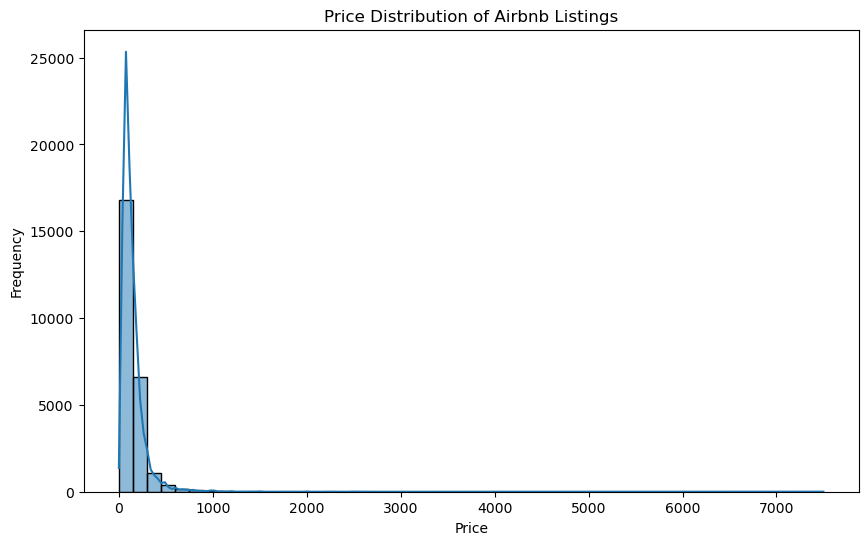

In [60]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


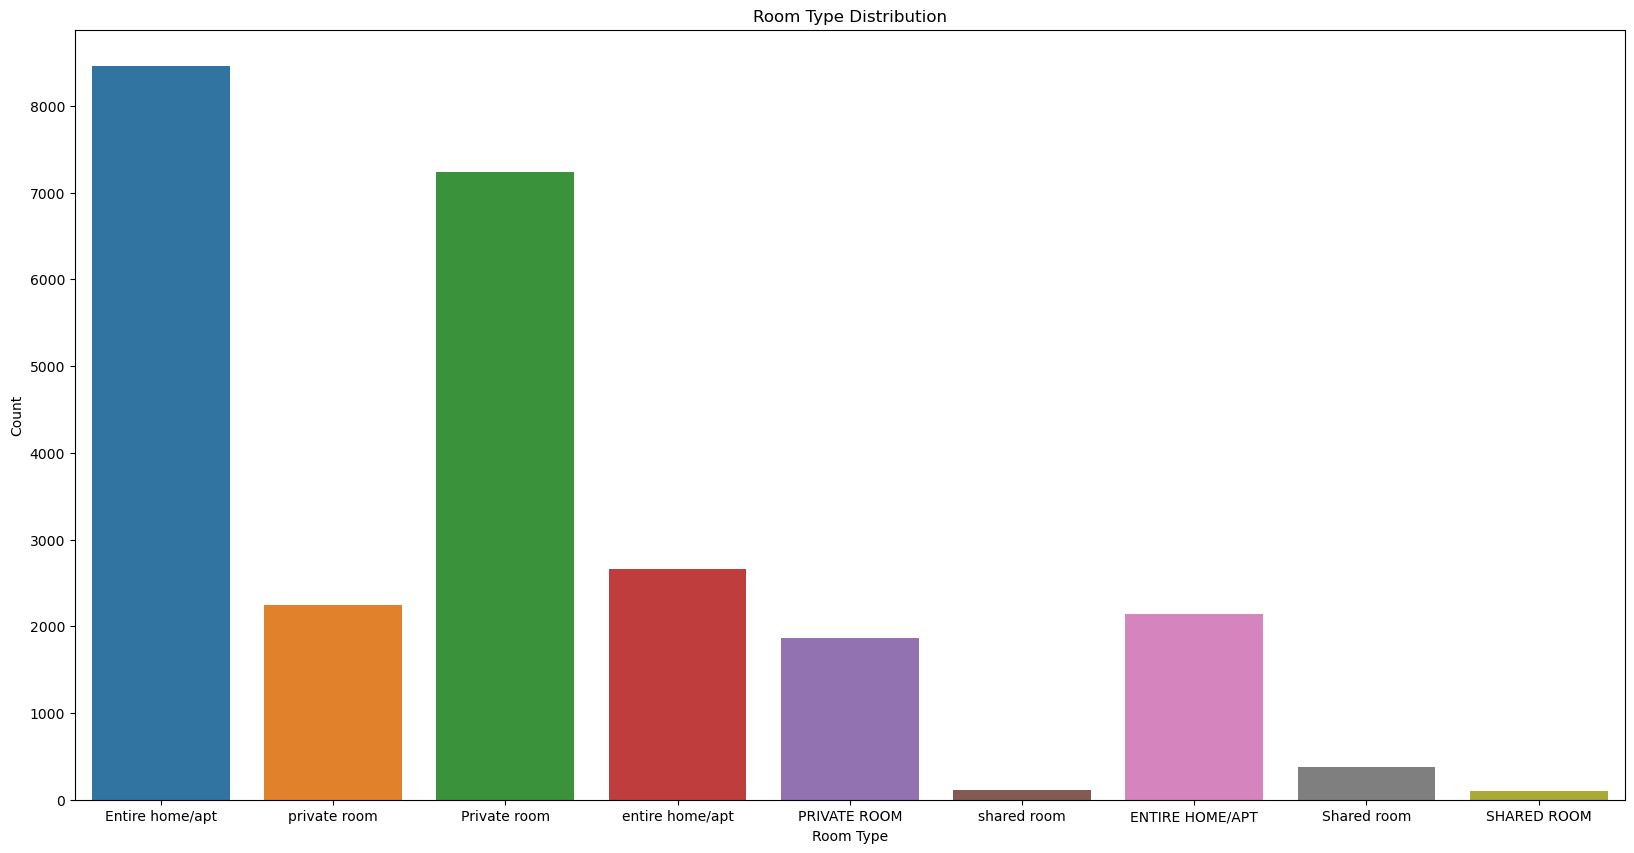

In [78]:
# Room Type Distribution
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='room_type')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


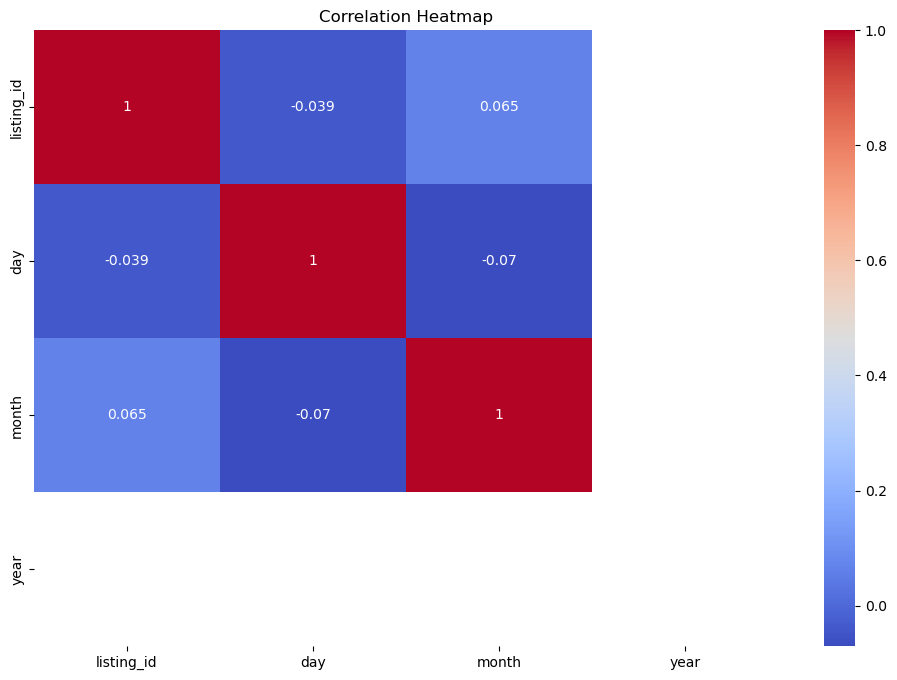

In [82]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes('int').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

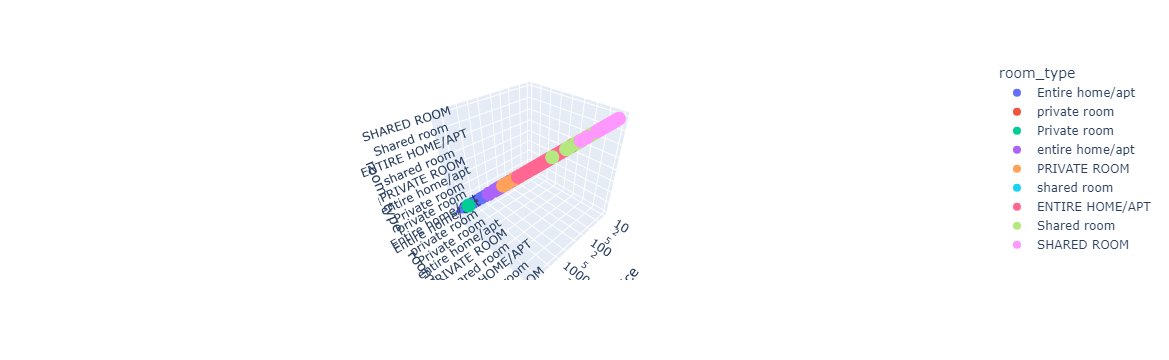

In [91]:
px.scatter_3d(df,x='price',y='room_type',z='room_type',color='room_type',log_x=True )

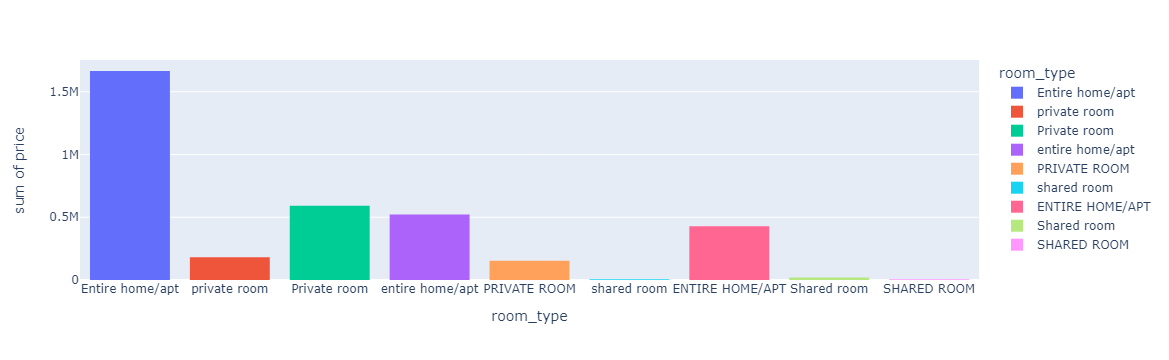

In [93]:
px.histogram(df,x='room_type',y='price',color='room_type',nbins=20)

# modeling

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [86]:
# Select categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['nbhood_full', 'host_name', 'description', 'room_type'], dtype='object')


In [88]:
# Check for missing values in categorical columns
print(df[categorical_cols].isnull().sum())

nbhood_full    0
host_name      0
description    0
room_type      0
dtype: int64


In [90]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    # Convert all values to string to avoid mixed types
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

# Display the encoded DataFrame
df.head()

listing_id  price  nbhood_full  host_name  description  room_type  day  \
0        2595  225.0          112       3101        19653          1   21   
1        3831   89.0           61       4029         7801          1    5   
2        5099  200.0          114       1250        12799          1   22   
3        5178   79.0          106       6252        12817          7   24   
4        5238  150.0           97        777         8995          1    9   

   month  year  
0      5  2019  
1      7  2019  
2      6  2019  
3      6  2019  
4      6  2019

In [138]:
# split our data 
X= df[['room_type']]
y= df['price']

In [140]:
# train test split our data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [142]:
#Initialize Scaler
scaler_standard = StandardScaler()

#Fit and Transform the Training Data
#Standard Scaling
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

In [144]:
# model1 linerLinearRegression
lr = LinearRegression()
# fit our data 
lr.fit(X_train_scaled_standard,y_train)
#predict 
y_pred = lr.predict(X_test_scaled_standard)

# evaluate our model 

In [147]:
lr.coef_

array([-26.0901951])

In [149]:
lr.intercept_

140.69601032155617

In [151]:
mean_absolute_error(y_test,y_pred)

79.77757571394898

In [153]:
mean_squared_error(y_test,y_pred)

22827.882566634307

In [155]:
r2_score(y_test,y_pred)

0.03111608783303388

In [157]:
#model2 
sv = LinearSVC()
# fit our data 
sv.fit(X_train_scaled_standard,y_train)
#predict 
y_pred = sv.predict(X_test_scaled_standard)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [159]:
sv.score(X,y)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


0.03386129967051725

In [161]:
mean_absolute_error(y_test,y_pred)

86.89700337368525

In [162]:
r2_score(y_test,y_pred)

-0.07185309733988143

In [169]:
#model 3 
rf = RandomForestRegressor(max_depth=20,n_jobs=10)
rf.fit(X_train_scaled_standard,y_train)
y_pred = rf.predict(X_test_scaled_standard)

In [179]:
mean_absolute_error(y_test,y_pred)

65.4196750419382

In [181]:
r2_score(y_test,y_pred)

0.1568291315477115